## Create flatten light curve with a single transit
### This corresponds to the data used in Sect. 5.4 of pyaneti II paper
#### O. Barragán, July 2021

Load the libraries
(You have to have citlalicue installed in your computer `pip install citlalicue`)

In [1]:
#Load libraries
from __future__ import print_function, division, absolute_import
import numpy as np
import matplotlib.pyplot as plt
#Import the citlali class from citlalicue
#You can install citlalicue as pip install citlalicue
from citlalicue.citlalicue import citlali

In /home/barraganl/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/barraganl/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/barraganl/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/barraganl/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/barraganl/.local/lib/python3.6/site-packages/matplo

In [2]:
#start a random seed number
seed = 28
np.random.seed(seed)

#### Let us create the citlali (light curve) instance


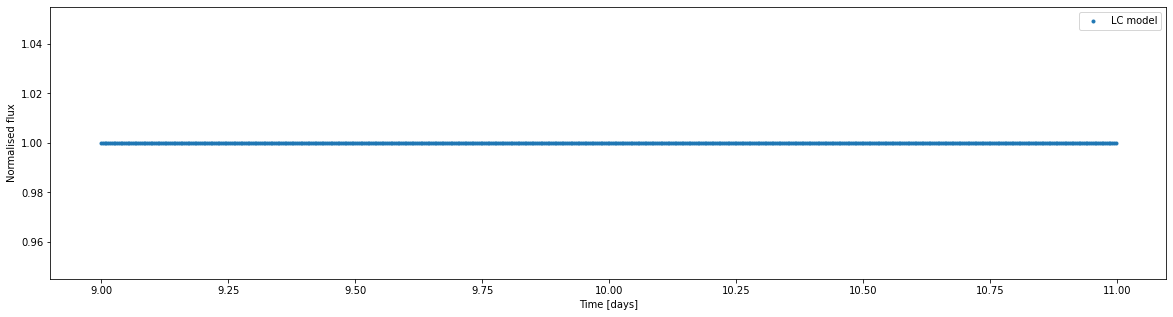

In [3]:
#Let us create a citlali instance with a duration of 3 days and a cadence of 5 min
lc = citlali(tmin=9,tmax=11,cadence=5/60./24.) 

#as it is now, the lc instance corresponds to the light curve of a uniform disc star
#let us plot it to see this
lc.plot(fsx=20,fsy=5)

## Time to add the transit signal

We will create one transit signal assuming we have one planet that orbits a star with a density $\rho_* = 1.4\, \mathrm{g\,cm^{-3}}$.

The first set of transit signals will be asigned to a planet with parameters

$$
T_0 = 10 d,
P  = 30 d,
b  = 0.5,
r_p = 0.025,
$$

where $T_0$ time of periastron, $P$ orbital period, $b$ impact parameter, $r_p$ planet radius scaled to the radius of the star.

The quadractic limb darkening coefficients of the star are

$$
u_{1,b1} = 0.25,
u_{2,b1} = 0,
$$

and the second

$$
u_{1,b2} = 0.50,
u_{2,b2} = 0.25.
$$

Let us create the parameters with all the values

In [4]:
#Stellar density
rho = 1.4

#Planet b parameters
T0b = 10.
Pb  = 30.
bb  = 0.5
rpb = 0.025

#Instrument b1 limb darkening coefficients
u1 = 0.25
u2 = 0

### Add planet to the light curve

We will add the planet signal to our lc light curve. 

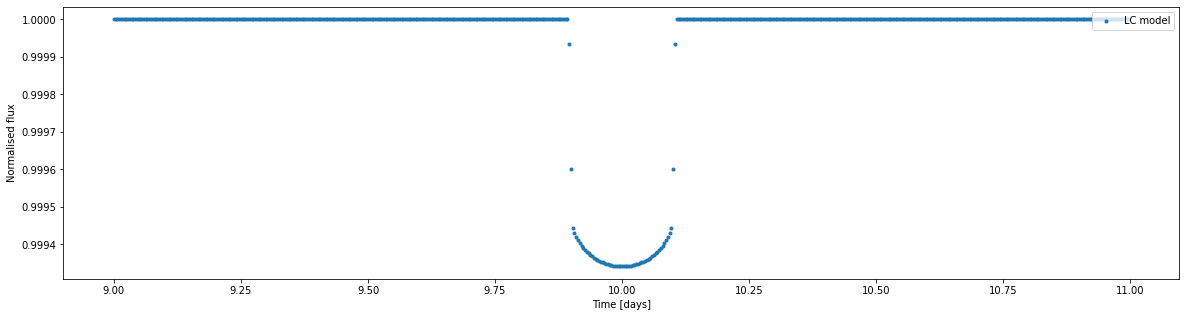

In [5]:
#We pass the parameters to cilatlicue as

#pars = [T0,P,b,rho,rp,u1,u2]

#Let us create a list with all the parameters for planet 
parsb = [T0b,Pb,bb,rho,rpb,u1,u2]

#Let us add the planet b by calling the add_transits method
lc.add_transits(planet_parameters=parsb,planet_name='b')


#re-plot the light curve to see the planets
lc.plot(fsx=20,fsy=5)

## Time to add white noise

We will add white noise to our data. We will assume our data has error bars of 100 ppm. This can be done easily by calling the `add_white_noise` method for each citlali instance.

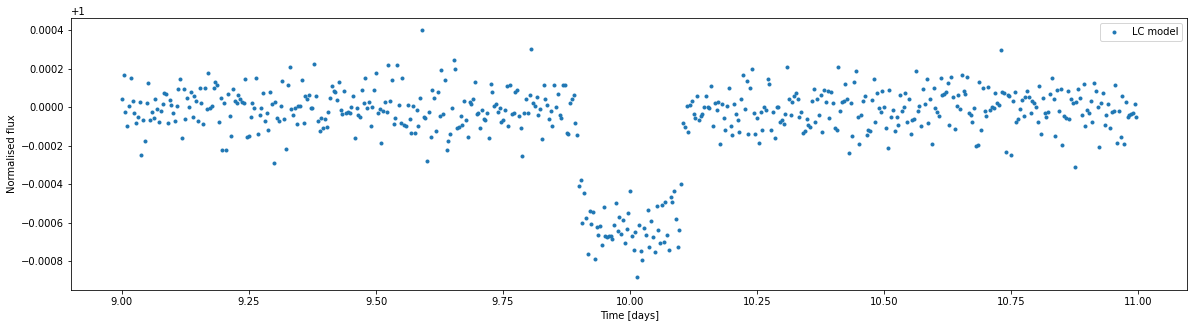

In [6]:
#Define the error bar that we want to add
error_bar = 100e-6

#Call the add_white_noise attribute
lc.add_white_noise(std=error_bar)

#and plot
lc.plot(20,5)

## Let us save the data in the lc_single.dat file

Let us save the light curves in a file containing time, flux, and error.

In [7]:
fname = 'lc_single.dat'
with open(fname,'w') as f:
    for i in range(len(lc.time)):
        f.write("{} {} {}\n".format(lc.time[i],lc.flux[i],lc.error_bar))